In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import random 
from citipy import citipy
import requests as req
# Import the API key.
from config import weather_api_key

In [2]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [3]:
lats = np.random.uniform(-90,90,size=1500)
lngs = np.random.uniform(-180,180,size=1500)
lats_lngs = zip(lats,lngs)

lats_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lats_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

620

In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [33]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
# Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vaini
Processing Record 2 of Set 1 | belmonte
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | krasnoselkup
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | puerto ayora
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | cabo san lucas
Processing Record 9 of Set 1 | dikson
Processing Record 10 of Set 1 | georgetown
Processing Record 11 of Set 1 | saint-philippe
Processing Record 12 of Set 1 | cantanhede
City not found. Skipping...
Processing Record 13 of Set 1 | aflu
Processing Record 14 of Set 1 | kavaratti
Processing Record 15 of Set 1 | verkhnyaya inta
Processing Record 16 of Set 1 | mataura
Processing Record 17 of Set 1 | rabo de peixe
Processing Record 18 of Set 1 | beira
Processing Record 19 of Set 1 | hambantota
Processing Record 20 of Set 1 | kaitangata
Processing Record 21 of Set 1 | hermanus
Processing Record 22 of Set 1 | smit

Processing Record 36 of Set 4 | ayorou
Processing Record 37 of Set 4 | ilo
Processing Record 38 of Set 4 | awbari
Processing Record 39 of Set 4 | balaipungut
Processing Record 40 of Set 4 | quatre cocos
Processing Record 41 of Set 4 | gornopravdinsk
Processing Record 42 of Set 4 | moa
Processing Record 43 of Set 4 | pafos
Processing Record 44 of Set 4 | varzea da palma
Processing Record 45 of Set 4 | srednekolymsk
Processing Record 46 of Set 4 | vung tau
Processing Record 47 of Set 4 | shasta lake
Processing Record 48 of Set 4 | sakakah
Processing Record 49 of Set 4 | hervey bay
Processing Record 50 of Set 4 | sioux lookout
Processing Record 1 of Set 5 | upernavik
Processing Record 2 of Set 5 | nome
City not found. Skipping...
Processing Record 3 of Set 5 | vaitupu
Processing Record 4 of Set 5 | fortuna
Processing Record 5 of Set 5 | dzaoudzi
Processing Record 6 of Set 5 | nishihara
Processing Record 7 of Set 5 | puerto quijarro
Processing Record 8 of Set 5 | portland
Processing Record

Processing Record 25 of Set 8 | holesov
Processing Record 26 of Set 8 | takhtamygda
Processing Record 27 of Set 8 | sao jose do belmonte
Processing Record 28 of Set 8 | gat
Processing Record 29 of Set 8 | acarau
Processing Record 30 of Set 8 | lincoln
Processing Record 31 of Set 8 | lunavada
Processing Record 32 of Set 8 | donskoye
Processing Record 33 of Set 8 | sinnamary
Processing Record 34 of Set 8 | russell
Processing Record 35 of Set 8 | flinders
Processing Record 36 of Set 8 | neiafu
Processing Record 37 of Set 8 | muswellbrook
Processing Record 38 of Set 8 | hovd
Processing Record 39 of Set 8 | naryan-mar
Processing Record 40 of Set 8 | oussouye
Processing Record 41 of Set 8 | boguchany
Processing Record 42 of Set 8 | buta
Processing Record 43 of Set 8 | kalmunai
Processing Record 44 of Set 8 | lorengau
Processing Record 45 of Set 8 | tabou
Processing Record 46 of Set 8 | nisia floresta
Processing Record 47 of Set 8 | kharp
Processing Record 48 of Set 8 | sarahan
Processing Rec

Processing Record 14 of Set 12 | vila franca do campo
Processing Record 15 of Set 12 | kingsland
Processing Record 16 of Set 12 | burgos
Processing Record 17 of Set 12 | kalabo
Processing Record 18 of Set 12 | blyth
Processing Record 19 of Set 12 | osakarovka
Processing Record 20 of Set 12 | le port
Processing Record 21 of Set 12 | comodoro rivadavia
Processing Record 22 of Set 12 | arlit
Processing Record 23 of Set 12 | newport
Processing Record 24 of Set 12 | bluefields
Processing Record 25 of Set 12 | rocha
Processing Record 26 of Set 12 | baker city
Processing Record 27 of Set 12 | bandarbeyla
Processing Record 28 of Set 12 | shahrud
Processing Record 29 of Set 12 | linqiong
City not found. Skipping...
Processing Record 30 of Set 12 | degirmen
Processing Record 31 of Set 12 | sambava
Processing Record 32 of Set 12 | pindobacu
Processing Record 33 of Set 12 | bitung
Processing Record 34 of Set 12 | gigmoto
Processing Record 35 of Set 12 | tokur
Processing Record 36 of Set 12 | manau

In [37]:
len(city_data)

571

In [38]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vaini,-21.2000,-175.2000,80.76,89,20,8.05,TO,2022-08-07 22:07:25
1,Belmonte,-15.8631,-38.8828,72.79,75,15,8.59,BR,2022-08-07 22:07:25
2,Albany,42.6001,-73.9662,90.64,69,64,1.01,US,2022-08-07 22:04:28
3,Krasnoselkup,65.7000,82.4667,58.71,78,100,8.23,RU,2022-08-07 22:07:26
4,Rikitea,-23.1203,-134.9692,72.52,69,100,32.12,PF,2022-08-07 22:02:46
5,Puerto Ayora,-0.7393,-90.3518,75.16,88,62,4.00,EC,2022-08-07 22:07:26
6,Ushuaia,-54.8000,-68.3000,38.86,65,0,10.36,AR,2022-08-07 22:03:10
7,Cabo San Lucas,22.8909,-109.9124,93.61,72,75,8.05,MX,2022-08-07 22:04:26
8,Dikson,73.5069,80.5464,42.04,100,100,9.95,RU,2022-08-07 22:07:27
9,Georgetown,5.4112,100.3354,80.89,87,20,0.00,MY,2022-08-07 22:03:26


In [39]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vaini,TO,2022-08-07 22:07:25,-21.2000,-175.2000,80.76,89,20,8.05
1,Belmonte,BR,2022-08-07 22:07:25,-15.8631,-38.8828,72.79,75,15,8.59
2,Albany,US,2022-08-07 22:04:28,42.6001,-73.9662,90.64,69,64,1.01
3,Krasnoselkup,RU,2022-08-07 22:07:26,65.7000,82.4667,58.71,78,100,8.23
4,Rikitea,PF,2022-08-07 22:02:46,-23.1203,-134.9692,72.52,69,100,32.12
5,Puerto Ayora,EC,2022-08-07 22:07:26,-0.7393,-90.3518,75.16,88,62,4.00
6,Ushuaia,AR,2022-08-07 22:03:10,-54.8000,-68.3000,38.86,65,0,10.36
7,Cabo San Lucas,MX,2022-08-07 22:04:26,22.8909,-109.9124,93.61,72,75,8.05
8,Dikson,RU,2022-08-07 22:07:27,73.5069,80.5464,42.04,100,100,9.95
9,Georgetown,MY,2022-08-07 22:03:26,5.4112,100.3354,80.89,87,20,0.00


In [40]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [42]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [43]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'08/07/22'

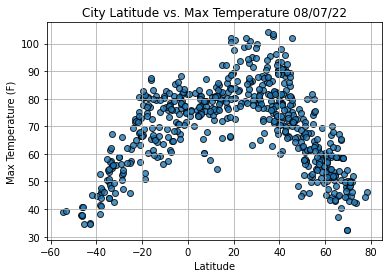

In [46]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

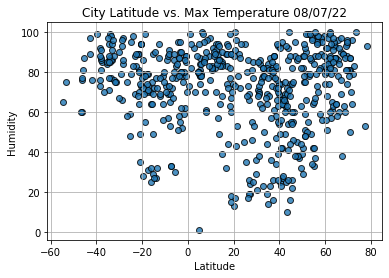

In [50]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

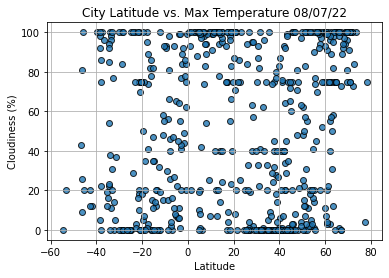

In [51]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

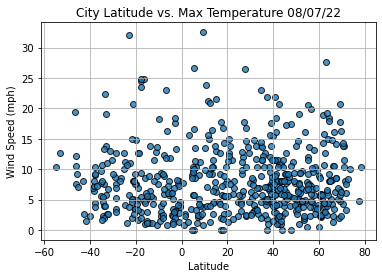

In [52]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [54]:
from scipy.stats import linregress
import matplotlib.pyplot as plt